In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, TimeDistributed, MaxPool2D, MaxPooling2D, Flatten, SimpleRNN, GRU, LSTM, Dense

In [49]:
data = []
labels = []
h, w = 50, 120
dx, dy = 3, 2

In [50]:
def make_frame(dataset_size):


  for d in range(dataset_size):
    frames = []
    label = random.choice((0, 1))
    if label == 0:
        x = 20
        y = h

        for _ in range(20):
          img = np.ones((h, w))*255
          # img = np.full((h, w), color, dtype=np.uint8)
          cv2.circle(img, (x, y), 4, (0), -1)
          x = x + dx
          y = y - dy
          frames.append(img)

    elif label == 1:
        x = w-20
        y = 0

        for i in range(20):
          img = np.ones((h, w))*255
          cv2.circle(img, (x, y), 4, (0), -1)
          x = x - dx
          y = y + dy
          frames.append(img)

    labels.append(label)
    data.append(frames)

  return data, labels

In [51]:
dataset, labels = make_frame(100)
dataset = np.array(dataset)
labels = np.array(labels)

dataset.shape, labels.shape

((100, 20, 50, 120), (100,))

In [52]:
dataset = dataset[..., np.newaxis]
labels = labels[..., np.newaxis]

dataset.shape, labels.shape

((100, 20, 50, 120, 1), (100, 1))

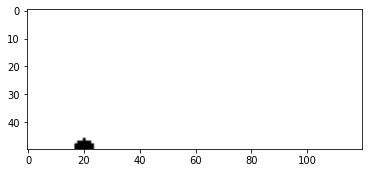

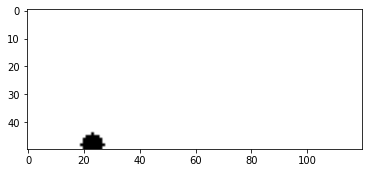

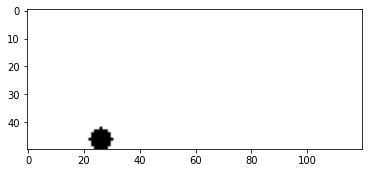

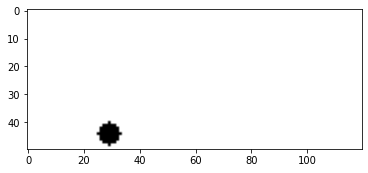

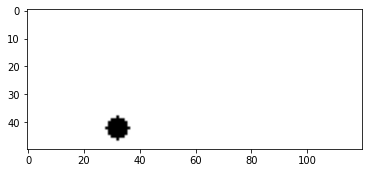

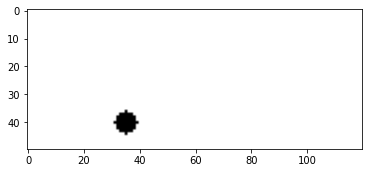

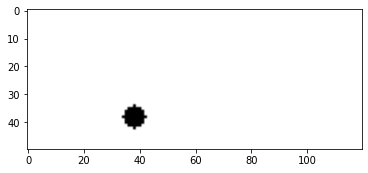

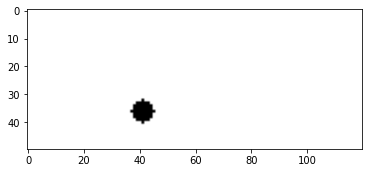

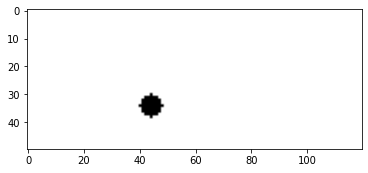

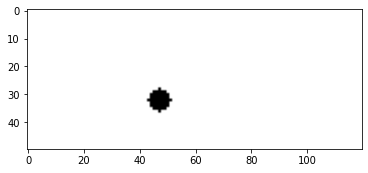

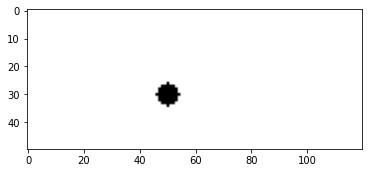

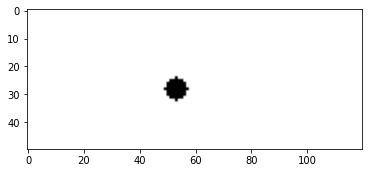

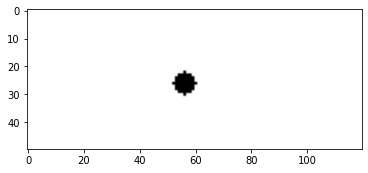

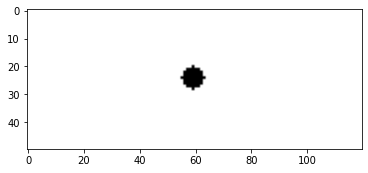

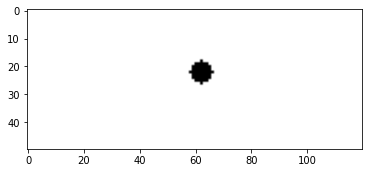

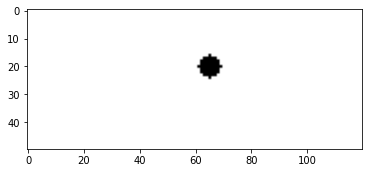

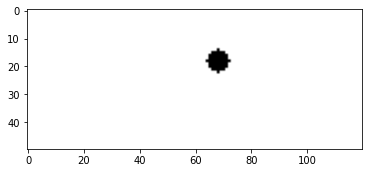

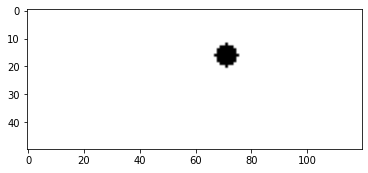

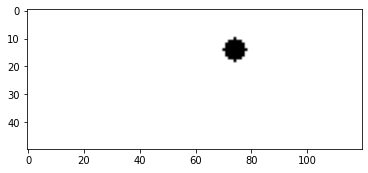

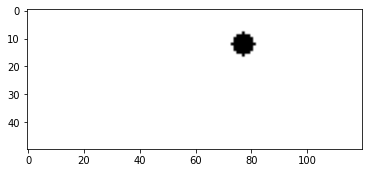

In [43]:
for frame in range(len(dataset[0, :])):
  plt.imshow(dataset[0, frame, :, :,0], cmap='gray')
  plt.show()

In [53]:
model = tf.keras.models.Sequential([
    TimeDistributed(Conv2D(2, (3, 3), activation="relu", input_shape=(None, h, w, 1))),
    TimeDistributed(MaxPooling2D(pool_size=(2, 2))),
    TimeDistributed(Flatten()),
    LSTM(20),
    Dense(2, activation='softmax')
])

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [55]:
model.fit(dataset, labels, batch_size=8, epochs=4)

Epoch 1/4
13/13 [==============================] - 5s 203ms/step - loss: 0.1266 - accuracy: 0.9400
Epoch 2/4
13/13 [==============================] - 3s 200ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 3/4
13/13 [==============================] - 3s 201ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 4/4
13/13 [==============================] - 3s 200ms/step - loss: 0.0025 - accuracy: 1.0000


In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_15 (TimeDi  (None, 20, 48, 118, 2)   20        
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 20, 24, 59, 2)    0         
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 20, 2832)         0         
 stributed)                                                      
                                                                 
 lstm_1 (LSTM)               (None, 20)                228240    
                                                                 
 dense_5 (Dense)             (None, 2)                 42        
                                                      

### Simple RNN

In [48]:
model.evaluate(dataset, labels)

4/4 [==============================] - 1s 241ms/step - loss: 0.0115 - accuracy: 1.0000


[0.011501654051244259, 1.0]

### GRU

In [15]:
model.evaluate(dataset, labels)

4/4 [==============================] - 2s 241ms/step - loss: 0.6983 - accuracy: 0.5200


[0.6983258128166199, 0.5199999809265137]

### LSTM

In [38]:
model.evaluate(dataset, labels)

4/4 [==============================] - 1s 251ms/step - loss: 0.0032 - accuracy: 1.0000


[0.003158072242513299, 1.0]